In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('logistics.csv')
df.head()

,payment_type,profit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,customer_segment,customer_state,...,order_region,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date,shipping_mode,label
0,DEBIT,34.448338,92.49099,9.0,Cardio Equipment,Caguas,Puerto Rico,12097.6830,Consumer,PR,...,Western Europe,Vienna,COMPLETE,191.0,9.0,Nike Men's Free 5.0+ Running Shoe,99.99,2015-08-13 00:00:00+01:00,Standard Class,-1
1,TRANSFER,91.193540,181.99008,48.0,Water Sports,Albuquerque,EE. UU.,5108.1045,Consumer,CA,...,South America,Buenos Aires,PENDING,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2017-04-09 00:00:00+01:00,Standard Class,-1
2,DEBIT,8.313806,89.96643,46.0,Indoor/Outdoor Games,Amarillo,Puerto Rico,4293.4478,Consumer,PR,...,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,1014.0,46.0,O'Brien Men's Neoprene Life Vest,49.98,2015-03-18 00:00:00+00:00,Second Class,1
3,TRANSFER,-89.463196,99.15065,17.0,Cleats,Caguas,Puerto Rico,546.5306,Consumer,PR,...,Central America,Santa Ana,PROCESSING,365.0,17.0,Perfect Fitness Perfect Rip Deck,59.99,2017-03-18 00:00:00+00:00,Second Class,0
4,DEBIT,44.722590,170.97824,48.0,Water Sports,Peabody,EE. UU.,1546.3980,Consumer,CA,...,Central America,Illinois,COMPLETE,1073.0,48.0,Pelican Sunstream 100 Kayak,199.99,2015-03-30 00:00:00+01:00,Standard Class,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15549 entries, 0 to 15548
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type              15549 non-null  object 
 1   profit_per_order          15549 non-null  float64
 2   sales_per_customer        15549 non-null  float64
 3   category_id               15549 non-null  float64
 4   category_name             15549 non-null  object 
 5   customer_city             15549 non-null  object 
 6   customer_country          15549 non-null  object 
 7   customer_id               15549 non-null  float64
 8   customer_segment          15549 non-null  object 
 9   customer_state            15549 non-null  object 
 10  customer_zipcode          15549 non-null  float64
 11  department_id             15549 non-null  float64
 12  department_name           15549 non-null  object 
 13  latitude                  15549 non-null  float64
 14  longit

In [4]:
df.isna().sum()

,0
payment_type,0
profit_per_order,0
sales_per_customer,0
category_id,0
category_name,0
customer_city,0
customer_country,0
customer_id,0
customer_segment,0
customer_state,0


In [31]:
df[['product_category_id','customer_country']]

,product_category_id,customer_country
0,9.0,Puerto Rico
1,48.0,EE. UU.
2,46.0,Puerto Rico
3,17.0,Puerto Rico
4,48.0,EE. UU.
...,...,...
15544,45.0,Puerto Rico
15545,46.0,Puerto Rico
15546,35.0,EE. UU.
15547,17.0,Puerto Rico


In [5]:
df.duplicated().sum()

np.int64(0)

***Our target feature is the label ranges from -1.0 to 1.0
 in our classification we can group the label into late (-1), on_time (0) and early (1)***

In [6]:
#creating a function to carry out the process
def classify_label(value):
    if value ==-1:
        return 'late_delivery'
    elif value==0:
        return 'on_time_delivery'
    else:
        return 'early_delivery'

df['delivery_delay']=df['label'].apply(classify_label)

print(df[['label','delivery_delay']].head(10))

   label    delivery_delay
0     -1     late_delivery
1     -1     late_delivery
2      1    early_delivery
3      0  on_time_delivery
4      1    early_delivery
5      1    early_delivery
6      1    early_delivery
7     -1     late_delivery
8      1    early_delivery
9      1    early_delivery


In [7]:
df.drop('label',axis=1,inplace=True)

In [8]:
# dividing the dataset into numerical and categorical

df_num=df.select_dtypes(include=['float','int'])
df_cat=df.select_dtypes(include=['object'])


In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_") #removing uneccessory space on the column name


In [11]:
from sklearn.impute import SimpleImputer

mean_imputer=SimpleImputer(strategy='mean') #replacing the nan rows with mean value

df_mean_imputer=mean_imputer.fit_transform(df_num)
df_mean_imputer=pd.DataFrame(df_mean_imputer,columns=df_num.columns, index=df_num.index)
df_mean_imputer.head()

,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,...,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price
0,34.448338,92.49099,9.0,12097.6830,725.0000,3.0,18.359064,-66.370575,12073.33600,15081.2890,...,38030.996,99.99,0.41,1.0,99.99,84.99157,32.083145,191.0,9.0,99.99
1,91.193540,181.99008,48.0,5108.1045,92745.1600,7.0,37.636528,-121.119630,5111.04800,56444.6840,...,142621.780,199.99,0.48,1.0,199.99,181.99000,91.235870,1073.0,48.0,199.99
2,8.313806,89.96643,46.0,4293.4478,2457.7297,7.0,18.294100,-66.037056,4134.76500,7508.5713,...,18723.178,49.98,0.09,2.0,99.96,93.81015,6.965549,1014.0,46.0,49.98
3,-89.463196,99.15065,17.0,546.5306,725.0000,4.0,18.202435,-66.370510,495.18726,56196.9260,...,141654.580,59.99,-0.80,2.0,119.98,99.89060,-95.401400,365.0,17.0,59.99
4,44.722590,170.97824,48.0,1546.3980,95118.6000,7.0,38.719500,-122.319720,1758.91190,5565.5796,...,14204.896,199.99,0.27,1.0,199.99,171.07587,44.569000,1073.0,48.0,199.99


In [12]:
mean_imputer=SimpleImputer(strategy='most_frequent')

df_mf_imputer=mean_imputer.fit_transform(df_cat)
df_mf_imputer=pd.DataFrame(df_mf_imputer,columns=df_cat.columns, index=df_cat.index)
df_mf_imputer.head()

,payment_type,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,order_city,order_country,order_date,order_region,order_state,order_status,product_name,shipping_date,shipping_mode,delivery_delay
0,DEBIT,Cardio Equipment,Caguas,Puerto Rico,Consumer,PR,Footwear,Europe,Viena,Austria,2015-08-12 00:00:00+01:00,Western Europe,Vienna,COMPLETE,Nike Men's Free 5.0+ Running Shoe,2015-08-13 00:00:00+01:00,Standard Class,late_delivery
1,TRANSFER,Water Sports,Albuquerque,EE. UU.,Consumer,CA,Fan Shop,LATAM,Buenos Aires,Argentina,2017-02-10 00:00:00+00:00,South America,Buenos Aires,PENDING,Pelican Sunstream 100 Kayak,2017-04-09 00:00:00+01:00,Standard Class,late_delivery
2,DEBIT,Indoor/Outdoor Games,Amarillo,Puerto Rico,Consumer,PR,Fan Shop,Europe,Burnie,France,2015-01-01 00:00:00+00:00,Western Europe,Nord-Pas-de-Calais-Picardy,COMPLETE,O'Brien Men's Neoprene Life Vest,2015-03-18 00:00:00+00:00,Second Class,early_delivery
3,TRANSFER,Cleats,Caguas,Puerto Rico,Consumer,PR,Apparel,LATAM,Santa Ana,El Salvador,2017-05-31 00:00:00+01:00,Central America,Santa Ana,PROCESSING,Perfect Fitness Perfect Rip Deck,2017-03-18 00:00:00+00:00,Second Class,on_time_delivery
4,DEBIT,Water Sports,Peabody,EE. UU.,Consumer,CA,Fan Shop,LATAM,Blumenau,Mexico,2015-03-28 00:00:00+00:00,Central America,Illinois,COMPLETE,Pelican Sunstream 100 Kayak,2015-03-30 00:00:00+01:00,Standard Class,early_delivery


In [ ]:
#df.drop('payment_type',axis=1,inplace=True)

In [ ]:
#df.drop('shipping_date',axis=1,inplace=True)

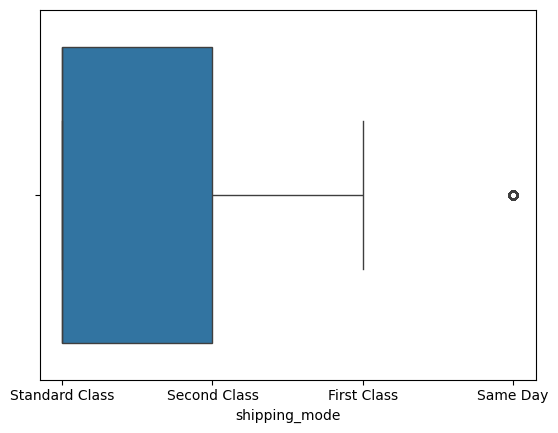

In [13]:

sns.boxplot(data=df,x='shipping_mode')
plt.show()

In [14]:
def num_uni_analysis(numerical_data):
    for col_name in numerical_data:
        print('*'*10, col_name, '*'*10)
        print(numerical_data[col_name].agg(['min', 'max', 'mean', 'median', 'std']))
        print()

In [15]:
df.describe(include='number')

,profit_per_order,sales_per_customer,category_id,customer_id,customer_zipcode,department_id,latitude,longitude,order_customer_id,order_id,...,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price
count,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,...,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000,15549.000000
mean,22.604542,179.888256,31.461342,6583.279789,35458.234968,5.413462,29.677619,-84.512318,6586.810354,35718.970019,...,89048.223248,137.005272,0.120391,2.165202,200.562289,179.780850,22.273342,685.213286,31.387606,136.629368
std,99.265198,113.727323,15.303616,4114.273782,37343.702033,1.581550,9.877876,20.681015,4101.324290,21071.742668,...,52235.717673,134.545269,0.474088,1.468627,125.984986,110.999735,117.503163,330.778230,15.256620,133.366285
min,-3442.500000,8.351162,2.000000,1.000000,603.000000,2.000000,-33.937553,-158.025990,1.000000,1.000000,...,1.000000,9.990000,-2.750000,1.000000,9.990000,7.490000,-3442.500000,19.000000,2.000000,9.990000
25%,7.562795,104.397330,18.000000,3119.983200,725.000000,4.000000,18.263327,-98.088170,3177.568800,16530.752000,...,41487.840000,50.000000,0.080000,1.000000,119.980000,105.570910,7.443977,403.000000,18.000000,50.000000
50%,31.693370,165.944170,29.000000,6429.229000,19145.775000,5.000000,33.435677,-76.580800,6308.530000,35391.336000,...,89075.270000,59.990000,0.270000,1.000000,199.920000,165.990000,32.440100,627.000000,29.000000,59.990000
75%,63.872166,242.440930,45.000000,9642.381000,77502.820000,7.000000,39.277313,-66.370575,9703.070000,55236.910000,...,137768.750000,199.990000,0.360000,3.000000,299.950000,242.436400,64.303566,1004.000000,45.000000,199.990000
max,911.800000,1939.990000,76.000000,20757.000000,99205.000000,12.000000,48.781933,115.263080,20757.000000,77204.000000,...,180501.860000,1999.990000,0.500000,5.000000,1999.990000,1939.990000,911.800000,1363.000000,76.000000,1999.990000


In [16]:
df.describe(include='object')

,payment_type,category_name,customer_city,customer_country,customer_segment,customer_state,department_name,market,order_city,order_country,order_date,order_region,order_state,order_status,product_name,shipping_date,shipping_mode,delivery_delay
count,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549,15549
unique,4,49,555,2,3,44,11,5,2742,152,1162,23,982,7,113,1170,4,3
top,DEBIT,Cleats,Caguas,EE. UU.,Consumer,PR,Fan Shop,Europe,Santo Domingo,United States,2017-04-22 00:00:00+01:00,Western Europe,England,COMPLETE,Perfect Fitness Perfect Rip Deck,2015-05-20 00:00:00+01:00,Standard Class,early_delivery
freq,6148,2212,5964,9438,8332,6109,5708,4578,214,2048,43,2513,654,5290,2219,52,9116,8976


In [17]:
df['delivery_delay'].value_counts()

,count
delivery_delay,
early_delivery,8976
late_delivery,3545
on_time_delivery,3028


In [18]:
num_uni_analysis(df_num)

********** profit_per_order **********
min      -3442.500000
max        911.800000
mean        22.604542
median      31.693370
std         99.265198
Name: profit_per_order, dtype: float64

********** sales_per_customer **********
min          8.351162
max       1939.990000
mean       179.888256
median     165.944170
std        113.727323
Name: sales_per_customer, dtype: float64

********** category_id **********
min        2.000000
max       76.000000
mean      31.461342
median    29.000000
std       15.303616
Name: category_id, dtype: float64

********** customer_id **********
min           1.000000
max       20757.000000
mean       6583.279789
median     6429.229000
std        4114.273782
Name: customer_id, dtype: float64

********** customer_zipcode **********
min         603.000000
max       99205.000000
mean      35458.234968
median    19145.775000
std       37343.702033
Name: customer_zipcode, dtype: float64

********** department_id **********
min        2.000000
max       12.00

In [19]:

y=df['delivery_delay']
X=df.drop(['delivery_delay'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42,stratify=y )# spliting the dataset scaling and encoding

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(12439, 40) (3110, 40)
(12439,) (3110,)


In [21]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer


oh_encoder=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
scaler=StandardScaler()
categorical_data=X_train.select_dtypes(include=['object']).columns
numerical_data=X_train.select_dtypes(include=['float','int']).columns


X_train_cat=oh_encoder.fit_transform(X_train[categorical_data])
X_train_num=scaler.fit_transform(X_train[numerical_data])
Xtrain=np.concatenate((X_train_cat,X_train_num),axis=1)
#creating a dataframe for the encoded data
Xtrain=pd.DataFrame(Xtrain,columns=oh_encoder.get_feature_names_out().tolist()+numerical_data.tolist())
Xtrain.head()

,payment_type_CASH,payment_type_DEBIT,payment_type_PAYMENT,payment_type_TRANSFER,category_name_Accessories,category_name_As Seen on TV!,category_name_Baby,category_name_Baseball & Softball,category_name_Basketball,category_name_Books,...,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040753,-0.577503,0.501014,1.253717,0.308090,0.015195,0.338099,-0.971969,-0.945784,-0.581839
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.608353,10.159654,0.375569,-0.791287,10.295020,9.959401,2.417476,2.002214,1.955292,10.294926
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.981353,-0.055562,-0.230749,-0.791287,-0.563520,-0.650643,-0.154052,-0.857353,-0.880402,-0.053111
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.368153,-0.055562,0.730997,-0.791287,-0.563520,-0.585128,0.318453,-0.857353,-0.880402,-0.053111
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.193719,0.466380,-0.565269,-0.791287,-0.008708,0.087010,-0.329383,1.163508,1.081042,0.475617


In [22]:
categorical_data=X_test.select_dtypes(include=['object']).columns
numerical_data=X_test.select_dtypes(include=['float','int']).columns


X_test_cat=oh_encoder.transform(X_test[categorical_data])
X_test_num=scaler.transform(X_test[numerical_data])

Xtest=np.concatenate((X_test_cat,X_test_num),axis=1)
Xtest=pd.DataFrame(Xtest,columns=oh_encoder.get_feature_names_out().tolist()+numerical_data.tolist())
Xtest

,payment_type_CASH,payment_type_DEBIT,payment_type_PAYMENT,payment_type_TRANSFER,category_name_Accessories,category_name_As Seen on TV!,category_name_Baby,category_name_Baseball & Softball,category_name_Basketball,category_name_Books,...,order_item_id,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,order_item_total_amount,order_profit_per_order,product_card_id,product_category_id,product_price
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.432952,-0.913037,0.271032,-0.109619,-1.347469,-1.334768,-0.136175,0.320085,-0.161206,-0.921736
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.554543,-0.055562,0.772812,-0.791287,-0.563520,-0.662548,0.232045,-0.857353,-0.880402,-0.053111
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.671783,-0.726629,0.291939,-0.791287,-1.276849,-1.322921,-0.152059,-0.181722,-0.161206,-0.732904
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.232294,-0.055562,0.187402,-0.791287,-0.563520,-0.592228,0.040269,-0.857353,-0.880402,-0.053111
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.938927,1.211936,0.187402,-0.791287,0.783801,0.806056,0.313369,0.813628,0.754134,1.230867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.385505,1.957567,-1.502723,-0.791287,1.576389,1.776650,-1.561000,0.955390,0.884897,1.986192
3106,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.048450,-0.887330,0.271032,1.253717,-0.959893,-0.865431,-0.036894,0.408700,-0.161206,-0.889365
3107,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.864662,-0.279251,0.730997,0.572049,0.783722,0.927349,0.929815,-1.496789,-1.468836,-0.279709
3108,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.293648,-0.577503,-0.481639,0.572049,-0.167384,-0.128820,-0.261582,-0.971969,-0.945784,-0.581839


In [23]:
from sklearn.linear_model import LogisticRegression
#traning our model using logistic regression
classifier = LogisticRegression()
classifier.fit(Xtrain, y_train)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**PREDICTION**

In [24]:
y_test_pred=classifier.predict(Xtest)


In [25]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
result

,Actual,Predicted
12702,early_delivery,early_delivery
12327,on_time_delivery,early_delivery
9195,early_delivery,on_time_delivery
11057,late_delivery,on_time_delivery
6897,on_time_delivery,early_delivery
...,...,...
14949,early_delivery,early_delivery
13062,on_time_delivery,late_delivery
10906,late_delivery,late_delivery
1346,early_delivery,early_delivery


In [26]:
result.loc[result['Actual']!=result['Predicted'],:]

,Actual,Predicted
12327,on_time_delivery,early_delivery
9195,early_delivery,on_time_delivery
11057,late_delivery,on_time_delivery
6897,on_time_delivery,early_delivery
7802,on_time_delivery,early_delivery
...,...,...
10256,on_time_delivery,early_delivery
731,on_time_delivery,early_delivery
12567,on_time_delivery,early_delivery
3133,early_delivery,late_delivery


In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(Xtrain, y_train)

RandomForestClassifier()

In [28]:
result=pd.DataFrame({'Actual':y_test,'Predicted':y_test_pred})
result

,Actual,Predicted
12702,early_delivery,early_delivery
12327,on_time_delivery,early_delivery
9195,early_delivery,on_time_delivery
11057,late_delivery,on_time_delivery
6897,on_time_delivery,early_delivery
...,...,...
14949,early_delivery,early_delivery
13062,on_time_delivery,late_delivery
10906,late_delivery,late_delivery
1346,early_delivery,early_delivery


**EVALUATION**

In [33]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_test_pred))

0.535048231511254


In [34]:
metrics.confusion_matrix(y_test,y_test_pred)

array([[1324,  282,  189],
       [ 351,  252,  106],
       [ 348,  170,   88]])

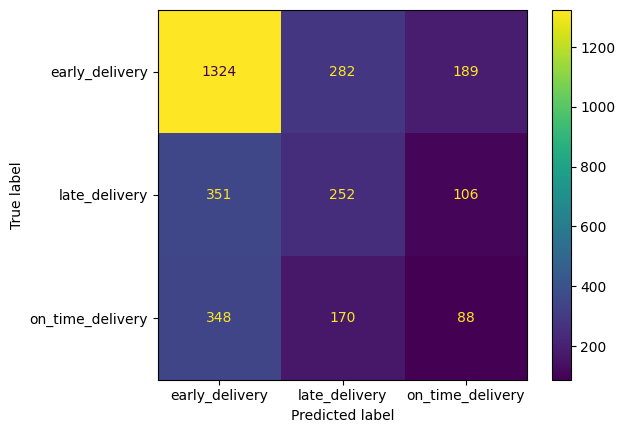

In [36]:
cm=metrics.confusion_matrix(y_test,y_test_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

This confusion matrix evaluates the performance of a classification model on three classes(early_delivery,late_delivery, ontime_delivey), the model perform best at predicting the early_delivey "class" with 1324 correct prediction.

In [38]:
print(metrics.classification_report(y_test,y_test_pred))

                  precision    recall  f1-score   support

  early_delivery       0.65      0.74      0.69      1795
   late_delivery       0.36      0.36      0.36       709
on_time_delivery       0.23      0.15      0.18       606

        accuracy                           0.54      3110
       macro avg       0.41      0.41      0.41      3110
    weighted avg       0.50      0.54      0.52      3110



early_delivery: the model perform well with (65%)precision, (74%)recall and (69%)f1_score
this show that most prediction of early_delivery are accurate.

late_delivery: the model perform below average the same thing with ontime_delivery

